<a href="https://colab.research.google.com/github/YOUSSEFBT369/Data-science/blob/main/Nettoyage_des_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('security_attack_dataset.csv')

In [ ]:
print("20 premières lignes:")
print(data.head(20))

20 premières lignes:
              Timestamp         SourceIP     AttackType         TargetIP  \
0   2023-01-04 22:00:00    235.86.247.11           DDoS  196.107.124.176   
1   2023-01-03 23:00:00   77.136.188.217           DDoS   139.107.85.198   
2   2023-01-05 01:00:00    89.193.77.109       Phishing   57.104.181.159   
3   2023-01-01 11:00:00     4.252.82.108       Phishing      32.5.147.45   
4   2023-01-03 09:00:00      205.3.29.75            NaN  164.147.161.113   
5   2023-01-03 01:00:00     11.91.126.70    Brute Force   209.215.241.17   
6   2023-01-01 16:00:00    234.1.157.231           DDoS  197.122.130.239   
7   2023-01-04 21:00:00    25.209.29.122    Brute Force    201.194.251.6   
8   2023-01-01 00:00:00    64.48.200.180  SQL Injection     196.64.247.4   
9   2023-01-01 07:00:00   125.96.188.100  SQL Injection   200.236.45.192   
10  2023-01-02 18:00:00     62.72.67.250            NaN     37.87.161.60   
11  2023-01-01 07:00:00        3.82.46.3  SQL Injection   100.255.2

In [ ]:
print(f"\nForme des données: {data.shape}")


Forme des données: (500, 5)


In [ ]:
print("\nInfo des colonnes:")
print(data.info())
print("\nTypes de données:")
print(data.dtypes)


Info des colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            500 non-null    object 
 1   SourceIP             500 non-null    object 
 2   AttackType           382 non-null    object 
 3   TargetIP             500 non-null    object 
 4   AttackDurationHours  355 non-null    float64
dtypes: float64(1), object(4)
memory usage: 19.7+ KB
None

Types de données:
Timestamp               object
SourceIP                object
AttackType              object
TargetIP                object
AttackDurationHours    float64
dtype: object


In [ ]:
numerical = data.select_dtypes(include=[np.number])
categorical = data.select_dtypes(include=['object'])

print(f"\nVariables numériques: {numerical.shape[1]}")
print(f"Variables catégorielles: {categorical.shape[1]}")


Variables numériques: 1
Variables catégorielles: 4


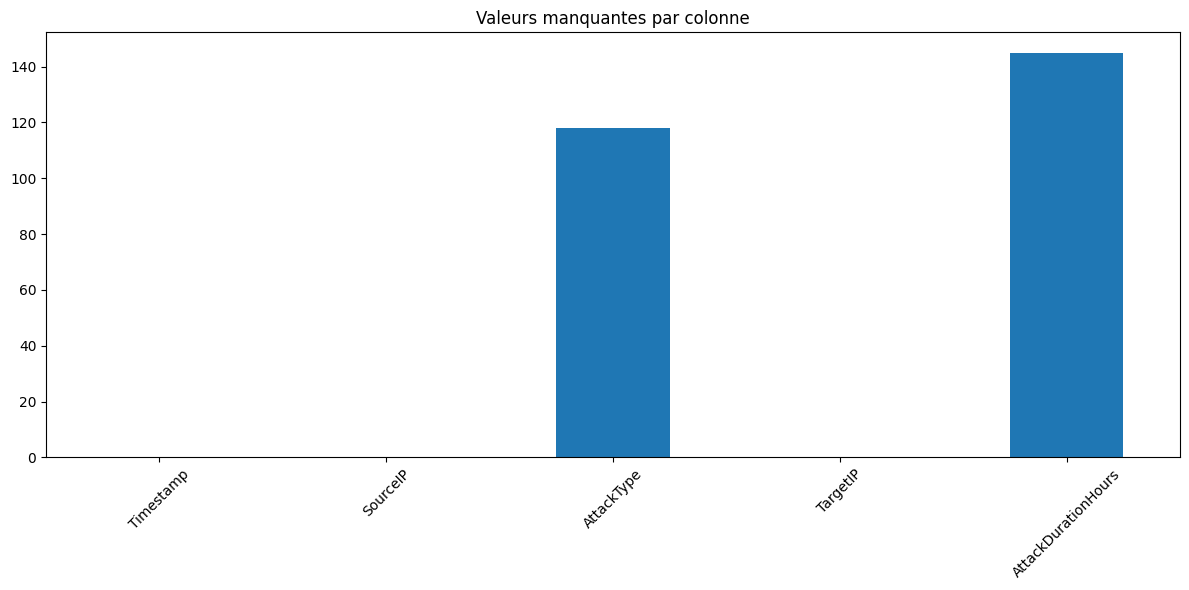

In [ ]:
plt.figure(figsize=(12, 6))
data.isnull().sum().plot(kind='bar')
plt.title('Valeurs manquantes par colonne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_mean = data.copy()
data_mean[numerical.columns] = data_mean[numerical.columns].fillna(data_mean[numerical.columns].mean())

In [ ]:
data_median = data.copy()
data_median[numerical.columns] = data_median[numerical.columns].fillna(data_median[numerical.columns].median())

In [ ]:
data_drop = data.copy()
data_drop = data_drop.dropna(subset=numerical.columns)

In [ ]:
data_const_num = data.copy()
data_const_num[numerical.columns] = data_const_num[numerical.columns].fillna(-999)

In [ ]:
data_ffill = data.copy()
data_ffill[numerical.columns] = data_ffill[numerical.columns].fillna(method='ffill')

data_bfill = data.copy()
data_bfill[numerical.columns] = data_bfill[numerical.columns].fillna(method='bfill')

/tmp/ipython-input-2224373528.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill[numerical.columns] = data_ffill[numerical.columns].fillna(method='ffill')
/tmp/ipython-input-2224373528.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bfill[numerical.columns] = data_bfill[numerical.columns].fillna(method='bfill')


In [ ]:
data_interp = data.copy()
data_interp[numerical.columns] = data_interp[numerical.columns].interpolate()

In [ ]:
data_regression = data.copy()

for col in numerical.columns:
    if data_regression[col].isnull().sum() > 0:
        # Séparer données avec et sans valeurs manquantes
        known_data = data_regression[data_regression[col].notnull()]
        unknown_data = data_regression[data_regression[col].isnull()]

        # Features et target
        X_train = known_data.drop(columns=[col])
        y_train = known_data[col]
        X_test = unknown_data.drop(columns=[col])

        # Convertir catégorielles en numériques
        X_train = pd.get_dummies(X_train)
        X_test = pd.get_dummies(X_test)

        # Aligner les colonnes
        X_train, X_test = X_train.align(X_test, join='left', axis=1)
        X_test = X_test.fillna(0)

        # Entraîner modèle
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        # Prédire et remplacer
        predictions = model.predict(X_test)
        data_regression.loc[data_regression[col].isnull(), col] = predictions

In [ ]:
data_const_cat = data.copy()
data_const_cat[categorical.columns] = data_const_cat[categorical.columns].fillna('VALUE_MISSING')

In [ ]:
data_cat_ffill = data.copy()
data_cat_ffill[categorical.columns] = data_cat_ffill[categorical.columns].fillna(method='ffill')

data_cat_bfill = data.copy()
data_cat_bfill[categorical.columns] = data_cat_bfill[categorical.columns].fillna(method='bfill')

/tmp/ipython-input-3419828678.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cat_ffill[categorical.columns] = data_cat_ffill[categorical.columns].fillna(method='ffill')
/tmp/ipython-input-3419828678.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cat_bfill[categorical.columns] = data_cat_bfill[categorical.columns].fillna(method='bfill')


In [ ]:
data_mode = data.copy()
for col in categorical.columns:
    data_mode[col] = data_mode[col].fillna(data_mode[col].mode()[0] if len(data_mode[col].mode()) > 0 else 'Unknown')

In [ ]:
data_random = data.copy()
for col in categorical.columns:
    mask = data_random[col].isnull()
    non_null_values = data_random[col].dropna()
    if len(non_null_values) > 0:
        data_random.loc[mask, col] = np.random.choice(non_null_values, size=mask.sum())

In [ ]:
data_classification = data.copy()

for col in categorical.columns:
    if data_classification[col].isnull().sum() > 0:
        # Séparer données avec et sans valeurs manquantes
        known_data = data_classification[data_classification[col].notnull()]
        unknown_data = data_classification[data_classification[col].isnull()]

        # Features et target
        X_train = known_data.drop(columns=[col])
        y_train = known_data[col]
        X_test = unknown_data.drop(columns=[col])

        # Convertir en dummies
        X_train = pd.get_dummies(X_train)
        X_test = pd.get_dummies(X_test)

        # Aligner les colonnes
        X_train, X_test = X_train.align(X_test, join='left', axis=1)
        X_test = X_test.fillna(0)

        # Entraîner modèle
        model = RandomForestClassifier()
        model.fit(X_train, y_train)

        # Prédire et remplacer
        predictions = model.predict(X_test)
        data_classification.loc[data_classification[col].isnull(), col] = predictions

In [ ]:
# Vérifier qu'il n'y a plus de valeurs manquantes
print("Valeurs manquantes après traitement:")
for method_name, dataset in [
    ('Moyenne', data_mean),
    ('Médiane', data_median),
    ('Valeur constante numérique', data_const_num),
    ('Forward Fill', data_ffill),
    ('Interpolation', data_interp),
    ('Mode catégoriel', data_mode),
    ('Aléatoire catégoriel', data_random)
]:
    print(f"{method_name}: {dataset.isnull().sum().sum()} valeurs manquantes")

Valeurs manquantes après traitement:
Moyenne: 118 valeurs manquantes
Médiane: 118 valeurs manquantes
Valeur constante numérique: 118 valeurs manquantes
Forward Fill: 118 valeurs manquantes
Interpolation: 118 valeurs manquantes
Mode catégoriel: 145 valeurs manquantes
Aléatoire catégoriel: 145 valeurs manquantes
